In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

In [3]:
# import new dataset(data1.csv) into jupyter notebook and name it cap2_data
cap2_data=pd.read_csv('data1.csv')

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#print out first 5 rows of data1
cap2_data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,21,68009401,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,C5,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,2.0,N,N
1,30,67715283,16000.0,16000.0,16000.0,36 months,12.88,538.18,C,C2,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,1.0,N,N
2,32,68533595,12000.0,12000.0,12000.0,36 months,10.78,391.62,B,B4,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,34,68537655,16800.0,16800.0,16800.0,60 months,12.88,381.23,C,C2,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,42,68615044,16000.0,16000.0,16000.0,60 months,13.99,372.21,C,C4,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,2.0,N,N


In [5]:
# remove the unnamed column and name it cap2_data1
cap2_data1=cap2_data.loc[:,~cap2_data.columns.str.contains('unnamed',case=False)]
cap2_data1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,68009401,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,C5,MORTGAGE,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,2.0,N,N
1,67715283,16000.0,16000.0,16000.0,36 months,12.88,538.18,C,C2,MORTGAGE,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,1.0,N,N
2,68533595,12000.0,12000.0,12000.0,36 months,10.78,391.62,B,B4,RENT,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,68537655,16800.0,16800.0,16800.0,60 months,12.88,381.23,C,C2,MORTGAGE,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,68615044,16000.0,16000.0,16000.0,60 months,13.99,372.21,C,C4,MORTGAGE,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,2.0,N,N


In [6]:
#remove unmeaningful features from cap2_data1
cap2_data1.drop(['id','url','zip_code','sub_grade'],axis=1,inplace=True)
print(cap2_data1)

        loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0         16000.0      16000.0          16000.0   60 months    14.85   
1         16000.0      16000.0          16000.0   36 months    12.88   
2         12000.0      12000.0          12000.0   36 months    10.78   
3         16800.0      16800.0          16800.0   60 months    12.88   
4         16000.0      16000.0          16000.0   60 months    13.99   
...           ...          ...              ...         ...      ...   
300271    39975.0      39975.0          39975.0   36 months   25.00%   
300272    13425.0      13425.0          13425.0   60 months   15.24%   
300273    10000.0      10000.0           9750.0   36 months   11.02%   
300274    20000.0      20000.0          20000.0   60 months   20.00%   
300275    10000.0      10000.0          10000.0   36 months    8.81%   

        installment grade home_ownership  annual_inc verification_status  ...  \
0            379.39     C       MORTGAGE     48000.0  

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
# check to see if any column has only 1 value
column_names=cap2_data1.columns
for column in column_names:
    if len(cap2_data1[column].value_counts().unique())==1:
        print(column)

policy_code


In [8]:
# remove 'policy_code' feautre from cap1_data1 since it only has 1 unique value 
cap2_data1.drop('policy_code',axis=1,inplace=True)
#cap2_data1.shape

In [9]:
#check to see how many features are left in cap2_data1
cap2_data1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'hardship_flag', 'debt_settlement_flag'],
      dtype='object')

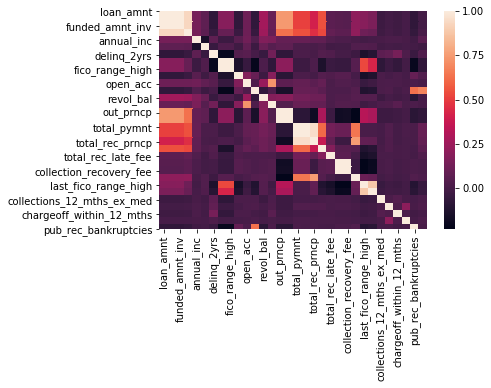

In [10]:
#calcuate Pearson's correlation of numerical features in cap2_data1
#put the Pearson's correlation in heatmap to represent the value
corr=cap2_data1.corr()
sn.heatmap(corr)

In [11]:
# drop all the features whose absolute value of Pearson's correlation is equal or greater than 0.9 
cap2_data1.drop(['loan_amnt','funded_amnt_inv','installment','fico_range_low','out_prncp','total_pymnt','total_pymnt_inv','recoveries'],axis=1,inplace=True)

In [12]:
# check the shape of cap2_data1 
cap2_data1.shape

(300276, 42)

In [13]:
print(cap2_data1)

        funded_amnt        term int_rate grade home_ownership  annual_inc  \
0           16000.0   60 months    14.85     C       MORTGAGE     48000.0   
1           16000.0   36 months    12.88     C       MORTGAGE     65000.0   
2           12000.0   36 months    10.78     B           RENT     98000.0   
3           16800.0   60 months    12.88     C       MORTGAGE    118000.0   
4           16000.0   60 months    13.99     C       MORTGAGE    142000.0   
...             ...         ...      ...   ...            ...         ...   
300271      39975.0   36 months   25.00%     D       MORTGAGE         0.0   
300272      13425.0   60 months   15.24%     C       MORTGAGE     48000.0   
300273      10000.0   36 months   11.02%     B       MORTGAGE    160000.0   
300274      20000.0   60 months   20.00%     D       MORTGAGE     55000.0   
300275      10000.0   36 months    8.81%     A       MORTGAGE     52116.0   

       verification_status   issue_d         loan_status pymnt_plan  ...  \

In [14]:
#get general information of cap2_data1
cap2_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300276 entries, 0 to 300275
Data columns (total 42 columns):
funded_amnt                   300276 non-null float64
term                          300276 non-null object
int_rate                      300276 non-null object
grade                         300276 non-null object
home_ownership                300276 non-null object
annual_inc                    300276 non-null float64
verification_status           300276 non-null object
issue_d                       300276 non-null object
loan_status                   300276 non-null object
pymnt_plan                    300276 non-null object
purpose                       300276 non-null object
addr_state                    300276 non-null object
dti                           297729 non-null float64
delinq_2yrs                   300276 non-null float64
earliest_cr_line              300276 non-null object
fico_range_high               300276 non-null float64
inq_last_6mths                300276

In [15]:
#sum up total missing values in cap2_data1 
cap2_data1.isnull().sum()

funded_amnt                      0
term                             0
int_rate                         0
grade                            0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
addr_state                       0
dti                           2547
delinq_2yrs                      0
earliest_cr_line                 0
fico_range_high                  0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                     383
total_acc                        0
initial_list_status              0
out_prncp_inv                    0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
collection_recovery_fee          0
last_pymnt_d        

In [16]:
# get year information out ot 'issue_d' feature
# year 2019 information is in different format, not able to exact out year information from to_datatime commend
# fill in '2019' in all N/A values which are year 2019 information 
# drop original 'issue_d' feature
cap2_data1.issue_d=pd.to_datetime(cap2_data1.issue_d,errors='coerce')
cap2_data1['issue_y']=cap2_data1.issue_d.dt.year.fillna('2019')
cap2_data1.drop('issue_d',axis=1,inplace=True)


C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#drop the other two date time columns from cap2_data1
cap2_data1.drop(['last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

In [18]:
#check to see any other columns have missing values
cap2_data1.isnull().sum()

funded_amnt                      0
term                             0
int_rate                         0
grade                            0
home_ownership                   0
annual_inc                       0
verification_status              0
loan_status                      0
pymnt_plan                       0
purpose                          0
addr_state                       0
dti                           2547
delinq_2yrs                      0
earliest_cr_line                 0
fico_range_high                  0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                     383
total_acc                        0
initial_list_status              0
out_prncp_inv                    0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
collection_recovery_fee          0
last_pymnt_amnt                  0
last_fico_range_high

In [19]:
# the 'int_rate' feature of year 2019 has '%' sign while other years do not have
# the 'revol_util' feature of year 2019 has '%' sign while other years do not have
# remove '%' from both features of year 2019 
cap2_data1.int_rate=cap2_data1.int_rate.replace({'%':''},regex=True)
cap2_data1.revol_util=cap2_data1.revol_util.replace({'%':''},regex=True)
cap2_data1.revol_util.tail()

300271    67.50
300272    16.20
300273    28.10
300274    82.10
300275    21.10
Name: revol_util, dtype: object

In [20]:
# save 'cap2_data1' as cap2_file.csv
cap2_data1.to_csv('cap2_file.csv')

In [21]:
# import KNNImputer to fill in the rest of missing values
from sklearn.impute import KNNImputer

imputer=KNNImputer() #iniate KNNImputer
mv_col=cap2_data1.ix[:,['dti','revol_util']] #get the two columns have missing values and name it mv_col
cap2_data2=imputer.fit_transform(mv_col) # use KNNImputer to fill in missing value with mean of its most similar neighbors and name new dataset cap2_data2
print(cap2_data2) #check to see cap2_data2

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


[[33.18 29.6 ]
 [18.96 54.3 ]
 [24.04 62.8 ]
 ...
 [ 2.96 28.1 ]
 [25.73 82.1 ]
 [22.45 21.1 ]]


In [ ]:
#save cap2_data1 to csv file
cap2_data2.to_csv('cap2_data2.csv')